In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl

# Задание 1
1. С помощью библиотеки OpenCV считайте изображение и преобразуйте в градации серого
2. Выполните дискретное преобразование Фурье. Определите компоненту полученного преобразования, находящуюся на пересечении 698 строки и 267 столбца.
3. Переместите компоненту, отвечающую нулевой частоте f[0][0], в центр и замените все элементы матрицы их модулями — амплитудами.
4. Примените логарифмическое шкалирование.
5. Занулите амплитуду основных низких частот — матрица размера 80x80 в центре изображения (плюс/минус 40 пикселей от центра). За точку центра следует выбрать результат целочисленного деления на 2 ширины и высота изображения.

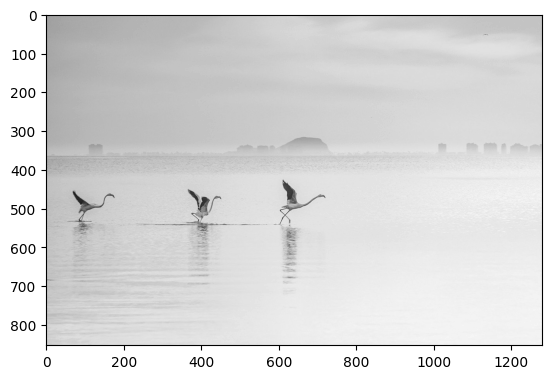

In [17]:
#1
img = cv2.imread('1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

In [20]:
#2.
f = np.fft.fft2(img)
print(f[698, 267])
print('real: ', round(f[698, 267].real, 2))
print('imagine: ', round(f[698, 267].imag, 2))

(4045.7809218157586-6267.4663291755105j)
real:  4045.78
imagine:  -6267.47


In [25]:
# 3.
fshift = np.fft.fftshift(f)

magnitude_spectrum = np.abs(fshift)

print('min:', np.min(magnitude_spectrum))
print('max:', np.max(magnitude_spectrum))

min: 3.0009427821854864
max: 230754800.0
True


In [28]:
# 4.

magnitude_spectrum = np.log(1+np.abs(fshift))
print("difference: ", np.max(magnitude_spectrum) - np.min(magnitude_spectrum))

difference:  17.870336208303534


In [36]:
# 5.
high, width = img.shape
high = round(high / 2)
width = round(width / 2) 
print('middle point: ', high, width)
fshift[high -  40 : high + 40, width - 40 : width + 40] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)

obr = np.abs(img_back)

print(round(obr[652][393], 2))

middle point:  426 640
6.39


# Задание 2
1. С помощью библиотеки OpenCV считайте изображение.
2. Постройте градиенты изображений с помощью оператора Лапласа.
3. Примените алгоритм детектора краев Кенни.

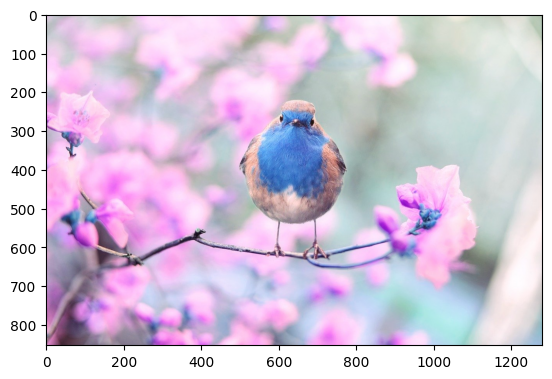

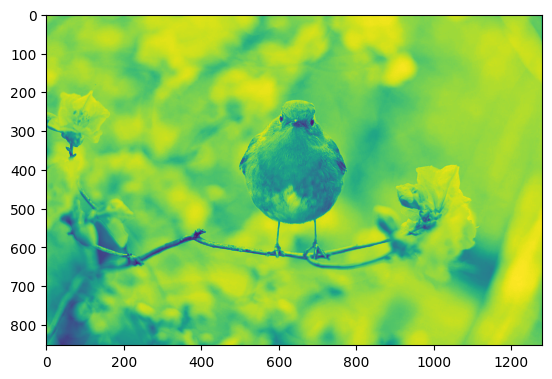

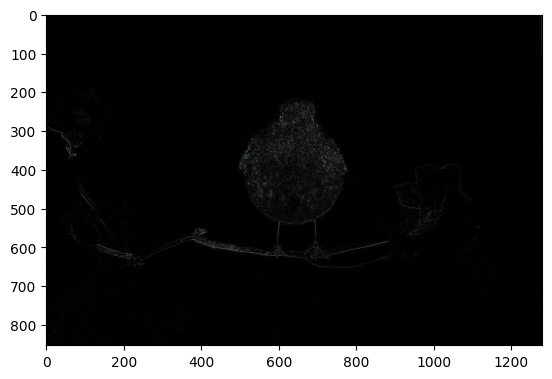

sum:  8168805


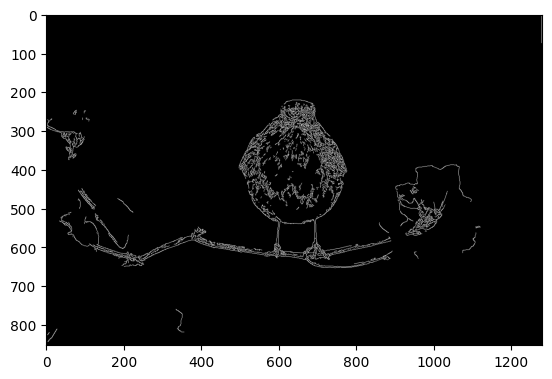

sum:  4931955


In [6]:
img_2 = cv2.imread('2.jpg')

plt.imshow(img_2)
plt.show()

img = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.show()

laplacian = cv2.Laplacian(img_2, -1)
plt.imshow(laplacian)
plt.show()

print('sum: ', np.sum(laplacian))

canny = cv2.Canny(img_2, 100, 200)
plt.imshow(canny, cmap = 'gray')
plt.show()
print('sum: ', np.sum(canny))